<a href="https://colab.research.google.com/github/lauracantik/mathtools/blob/main/Tugas06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Module

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt

# Statistics
from statistics import median,mean, stdev
from scipy import signal

import scipy.stats as stats
from scipy.stats import poisson, norm
from scipy.special import factorial

In [4]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/lauracantik/mathtools/main/healthcare-dataset-stroke-data.csv')
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# This function will find the mean of the given list
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
def find_mean(ls:list):
    # check if the list has some values
    if ls:
        # return the mean(sum_of_list_values/count_of_values_in_list)
        return(sum(ls)/len(ls))
    else:
        return 0
print("Mean for hypertension : ",find_mean(list(df['hypertension'])))
print("Mean for heart_disease: ",find_mean(list(df['heart_disease'])))
print("Mean for avg_glucose_level: ",find_mean(list(df['avg_glucose_level'])))
print("Mean for bmi: ",find_mean(list(df['bmi'])))

Mean for hypertension:  0.0974559686888454
Mean for heart_disease:  0.05401174168297456
Mean for avg_glucose_level:  106.14767710371804
Mean for bmi:  28.89323691179472


In [8]:
# untuk mencari variance
def calculate_variance(ls:list):
    # check mean of the list of values
    mean = find_mean(ls)
    if mean!=0:
        return sum((i - mean) ** 2 for i in ls) / len(ls)
    else:
        return 0
    
print("Variance for hypertension: ",calculate_variance(list(df['hypertension'])))
print("Variance for heart_disease: ",calculate_variance(list(df['heart_disease'])))
print("Variance for avg_glucose_level: ",calculate_variance(list(df['avg_glucose_level'])))
print("Variance for bmi: ",calculate_variance(list(df['bmi'])))

Variance for hypertension:  0.08795830285576071
Variance for heart_disease:  0.05109447344334588
Variance for avg_glucose_level:  2050.199528165802
Variance for bmi:  59.24788169578692


In [9]:
# mencari standar deviase
def calculate_standard_deviation(ls:list):
    return calculate_variance(ls)**(1/2)

print("Standard Devation for hypertension: ",calculate_standard_deviation(list(df['hypertension'])))
print("Standard Devation for heart_disease: ",calculate_standard_deviation(list(df['heart_disease'])))
print("Standard Devation for avg_glucose_level: ",calculate_standard_deviation(list(df['avg_glucose_level'])))
print("Standard Devation for bmi: ",calculate_standard_deviation(list(df['bmi'])))

Standard Devation for hypertension:  0.2965776506342997
Standard Devation for heart_disease:  0.22604086675498722
Standard Devation for avg_glucose_level:  45.27912905705897
Standard Devation for bmi:  7.697264559295524


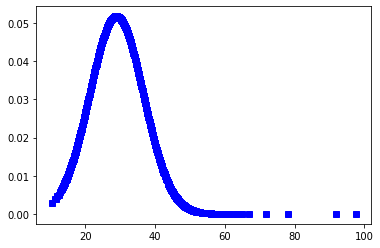

In [20]:
# Normal Distribution
mean_bmi = mean(df['bmi'])
sd_bmi = stdev(df['bmi'])
normal_df = norm.pdf(df['bmi'],loc = mean_bmi, scale = sd_bmi)
plt.plot(df['bmi'], normal_df, 'bs')
plt.show()

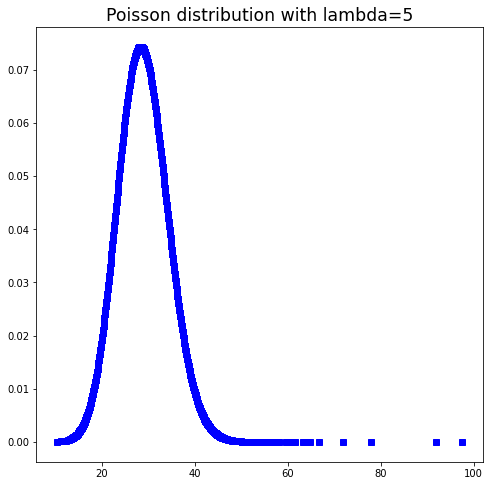

In [21]:
x=pd.Series(df['bmi']).to_numpy()

y = np.exp(-mean_bmi)*np.power(mean_bmi, x)/factorial(x)

plt.figure(figsize=(8,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()